In [1]:
import keras
from keras.datasets import mnist

In [15]:
# 加载MNIST数据集
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [14]:
# 查看数据
print('train shape=', train_images.shape)
print('train_label:', train_labels)
print('test shape=', test_images.shape)
print('test_label:', test_labels)

train shape= (60000, 28, 28)
train_label: [5 0 4 ... 5 6 8]
test shape= (10000, 28, 28)
test_label: [7 2 1 ... 4 5 6]


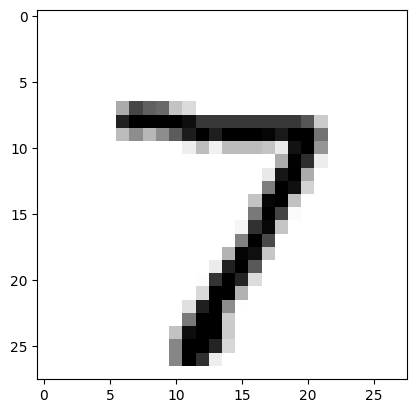

In [17]:
# 打开第一张图
digit = test_images[0]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [18]:
#构建网络结构
from keras import models
from keras.layers import Dense, Input

In [19]:
network = models.Sequential()
network.add(Input(shape=(28*28,)))
network.add(Dense(512, activation='relu'))
network.add(Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [20]:

from keras.utils import to_categorical
#对输入数据进行预处理
train_imgs= train_images.reshape((60000, 28 * 28))
print("before change:",test_labels[0])
# 将数据转换为float32类型，并除以255使得所有像素值在0-1之间
train_imgs = train_imgs.astype('float32') / 255

test_imgs = test_images.reshape((10000, 28 * 28))
test_imgs = test_imgs.astype('float32') / 255



before change: 7


In [21]:
#对标签进行处理
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print("after change:",test_labels[0])

after change: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [22]:
#训练模型
network.fit(train_imgs, train_labels, epochs=5, batch_size=128, validation_data=(test_imgs, test_labels), verbose=1)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8714 - loss: 0.4405 - val_accuracy: 0.9522 - val_loss: 0.1618
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9660 - loss: 0.1211 - val_accuracy: 0.9712 - val_loss: 0.0951
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9788 - loss: 0.0720 - val_accuracy: 0.9744 - val_loss: 0.0816
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9849 - loss: 0.0498 - val_accuracy: 0.9784 - val_loss: 0.0679
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9893 - loss: 0.0379 - val_accuracy: 0.9780 - val_loss: 0.0682


In [23]:
#验证结果
test_loss, test_acc = network.evaluate(test_imgs, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.9744 - loss: 0.0823
Test accuracy: 0.9779999852180481


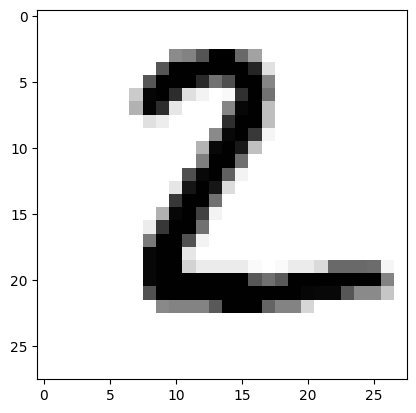

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [24]:
#输入一张图片，输出其标签

digit2=test_images[1]
plt.imshow(digit2,plt.cm.binary)
plt.show()

#预测结果
prediction=network.predict(digit2.reshape(1,28*28))
print(prediction)

In [26]:
# 在验证数据集上进行
#模型预测
res=network.predict(test_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step


In [42]:
res[1]

array([2.6365347e-08, 4.1917599e-05, 9.9990129e-01, 4.2706368e-05,
       4.9640821e-12, 1.5180288e-07, 7.4662253e-08, 1.3437955e-12,
       1.3762369e-05, 5.9462563e-10], dtype=float32)

In [45]:
# res[1].shape[0]=10
for i in range( res[1].shape[0]):
    if (res[1][i] >= 0.99):
        print("the number for the picture is: ", i)
        break

the number for the picture is:  2
